# Numpy

Numpy это огромная библиотека для работы с массивами, прекрасно оптимизированная и очень удобная для работы.

Вычислим число $\pi$ по следующей формуле:

$$ \frac{\pi^2}{6} = 1+\frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} +... $$

$$ \frac{\pi^2}{6} = \sum_{i=1}^{\infty} \frac{1}{i^2} $$

Обычная реализация через цикл for:

In [79]:
def pi():
    s = 0
    for i in range(1, 1000):
        s += (1. / i)**2 # s -- сумма в правой части уравнения
    return (s * 6)**0.5
%timeit pi()

148 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Те же вычисления, с использованием массивов numpy:

In [1]:
import numpy as np
arr = np.arange(1, 1000, dtype=float)

In [3]:
(1. / arr)**2

array([1.00000000e+00, 2.50000000e-01, 1.11111111e-01, 6.25000000e-02,
       4.00000000e-02, 2.77777778e-02, 2.04081633e-02, 1.56250000e-02,
       1.23456790e-02, 1.00000000e-02, 8.26446281e-03, 6.94444444e-03,
       5.91715976e-03, 5.10204082e-03, 4.44444444e-03, 3.90625000e-03,
       3.46020761e-03, 3.08641975e-03, 2.77008310e-03, 2.50000000e-03,
       2.26757370e-03, 2.06611570e-03, 1.89035917e-03, 1.73611111e-03,
       1.60000000e-03, 1.47928994e-03, 1.37174211e-03, 1.27551020e-03,
       1.18906064e-03, 1.11111111e-03, 1.04058273e-03, 9.76562500e-04,
       9.18273646e-04, 8.65051903e-04, 8.16326531e-04, 7.71604938e-04,
       7.30460190e-04, 6.92520776e-04, 6.57462196e-04, 6.25000000e-04,
       5.94883998e-04, 5.66893424e-04, 5.40832883e-04, 5.16528926e-04,
       4.93827160e-04, 4.72589792e-04, 4.52693526e-04, 4.34027778e-04,
       4.16493128e-04, 4.00000000e-04, 3.84467512e-04, 3.69822485e-04,
       3.55998576e-04, 3.42935528e-04, 3.30578512e-04, 3.18877551e-04,
      

In [88]:
import numpy as np

def pi():
    arr = np.arange(1, 1000, dtype=float)
    s = ((1. / arr)**2).sum()
    return (s * 6)**0.5
%timeit pi()

12.7 µs ± 459 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Во-первых, заметим, что код с numpy более чем в 10 раз быстрее

Во-вторых, куда подевался цикл for? В большинстве случаев, когда мы работаем с numpy, циклы вообще не нужны!

Например:
    
    x = [1, 2, 3]
    y = 4
    print(x * y)

In [8]:
x = [1, 2, 3]
y = 4
print(x * y)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


Но на деле такой функционал редко нужен (вообще трудно представить, когда он нужен). Напротив, предположим, что x -- массив с количеством бензина, которое я заправлял в бак три дня подряд, а y -- цена бензина:

In [9]:
x = np.array([1, 2, 3])
y = 4
print(x * y)

[ 4  8 12]


Не правда ли, такое поведение гораздо логичнее? Результат произведения `x * y` это суммы, которые я платил за бензин каждый день. 

Как достичь того же с обычными списками? Сравните скорость выполнения с numpy

In [25]:
x

array([1.e+001, 1.e+012, 1.e+023, 1.e+034, 1.e+045, 1.e+056, 1.e+067,
       1.e+078, 1.e+089, 1.e+100])

In [33]:
def fun_exmp(x=None):
    '''
    Some documentation
    '''
    if x in None:
        print ('None')
    else:
        print('not none')

In [34]:
fun_exmp?

In [31]:
mp.plot?

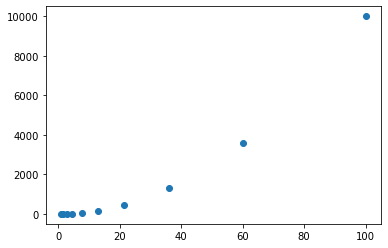

In [27]:
x = np.logspace(0, 2, 10)
y = x**2

mp.plot(x, y, 'o')
mp.show()

Определим какую-нибудь арифметическую функцию:

    def is_even(x):
        return x % 2 == 0
        
Можно ли применить эту функцию к массиву numpy?

In [89]:
def is_even(x):
    return x % 2 == 0

x = np.arange(10)

is_even(x)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

Теперь определим другую функцию:

    def is_power_of_two(x):
        if x == 2:
            return True
        if x % 2 != 0 or x < 2:
            return False
        return is_power_of_two(x // 2)

Будет ли работать такой код:

    x = np.arange(10)
    is_power_of_two(x)
    
Чтобы заработало нужно

    is_power_of_two = np.vectorize(is_power_of_two)

In [36]:
def is_power_of_two(x):
    if x == 2:
        return True
    if x % 2 != 0 or x < 2:
        return False
    return is_power_of_two(x // 2)

# is_power_of_two = np.vectorize(is_power_of_two)

for el in np.array([2, 3, 4]):
    is_power_of_two(el) # np.array([2, 3, 4]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Задача: вычислить число Эйлера с numpy, без for

$$e = \sum_{n=0}^{\infty} \frac{1}{n!} = \frac{1}{1} + \frac{1}{1} + \frac{1}{1 \cdot 2} + \frac{1}{1 \cdot 2 \cdot 3} + ...$$

В numpy.math есть функция факториала: numpy.math.factorial

Примечание: для этого вычисления вполне достаточно $n_{max} \sim 10$, но попробуйте также $n = 100$

In [43]:
n = np.arange(10)
# f = np.vectorize(np.math.factorial)
# (1 / f(n)).sum()
(1 / np.vectorize(np.math.factorial)(n)).sum()

2.718281525573192

Заметим, что в numpy есть и $\pi$, и $e$:

    np.pi
    np.e

Задача: приближенно вычислить сумму:

$$\sum_{n=2}^{\infty} \frac{1}{n \ln^3 (n)}$$

в numpy определены многие математические функции, например:

    np.log
    np.log10

Задача: приближенно вычислить сумму

$$\sum_{n=1}^{\infty} \arctan\left(\frac{1}{n^2 - n + 1}\right)$$

В numpy определены все нужные тригонометрические функции, например:

    np.sin
    np.tan
    np.arctan

Тригонометрические функции работают с радианами. Для перевода в градусы и обратно есть функции

    np.radians
    np.degrees

## DAMPE data set

В данном сете используются данные Монте-Карло моделирования физического эксперимента DAMPE:

http://dpnc.unige.ch/dampe/

![DAMPE](http://dpnc.unige.ch/dampe/pics/dampe_layout_2.jpg)

Загружает BGO данные:

In [44]:
import numpy as np

In [46]:
bgo_x = np.load('../BGOdata/bgoX.npy') # сигнал, зарегистрированный в XZ-ячейках калориметра
bgo_y = np.load('../BGOdata/bgoY.npy') # то же, YZ
bgo_x_simu = np.load('../BGOdata/bgoXsimu.npy') # сигнал, смоделированный в XZ-плоскости
bgo_y_simu = np.load('../BGOdata/bgoYsimu.npy') # то же, YZ
theta_x = np.load('../BGOdata/thetaX.npy') # угол theta
theta_y = np.load('../BGOdata/thetaY.npy')
e_prim = np.load('../BGOdata/eprim.npy')

Какую "форму" имеют данные? (shape)

In [47]:
bgo_x.shape

(10000, 7, 22)

Для визуализации будем использовать matplotlib:

    import matplotlib.pyplot as plt
    
Также пригодится

    from matplotlib.colors import LogNorm

In [48]:
import matplotlib.pyplot as mp
from matplotlib.colors import LogNorm

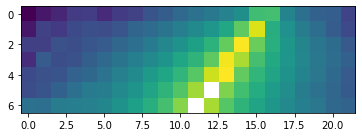

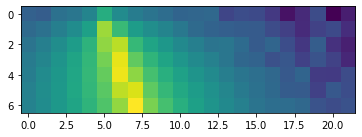

In [52]:
mp.imshow(bgo_x[1], norm=LogNorm())
mp.show()
mp.imshow(bgo_y[1], norm=LogNorm())
mp.show()

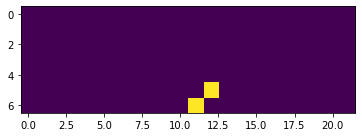

In [56]:
mask = (bgo_x == 0)

mp.imshow(mask[1])
mp.show()

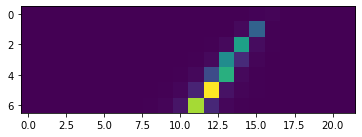

In [61]:
mp.imshow(bgo_x_simu[1])
mp.show()

In [62]:
bgo_x_simu[mask]

array([6551548.12804465, 4871282.52400333, 4208036.84793687, ...,
       4717153.41658067, 2470744.61335747, 2506482.21995548])

In [66]:
bgo_x_simu.shape

(10000, 7, 22)

In [67]:
(bgo_x_simu + bgo_y_simu - bgo_x - bgo_y).shape

(10000, 7, 22)

In [70]:
x = bgo_x[1]

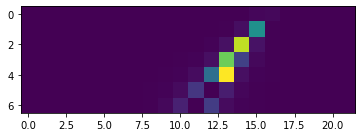

In [72]:
mp.imshow(x)
mp.show()

In [81]:
x.sum(axis=(0, 1))

14842416.0

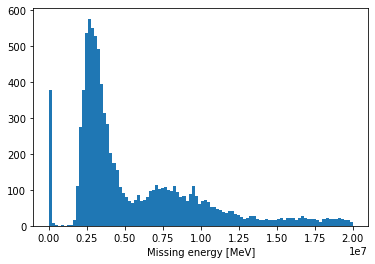

In [64]:
e_miss = (bgo_x_simu + bgo_y_simu - bgo_x - bgo_y).sum(axis=(1, 2))

mp.hist(e_miss, 100, (0, 2e7))
mp.xlabel('Missing energy [MeV]')
mp.show()

In [83]:
mask = (e_miss > 2e6) * (e_miss < 4e6)

In [85]:
bgo_x[mask].shape

(4330, 7, 22)

In [103]:
mask

array([False, False,  True, ..., False,  True,  True])

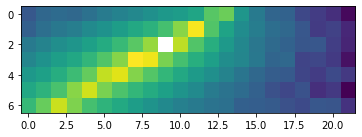

In [102]:
mp.imshow(bgo_x[~mask][5], norm=LogNorm())
mp.show()

In [104]:
is_sat_x = (bgo_x_simu - bgo_x) > 25e3
is_sat_y = (bgo_y_simu - bgo_y) > 25e3

n_sat = (is_sat_x.astype(int) + is_sat_y.astype(int)).sum(axis=(1, 2))

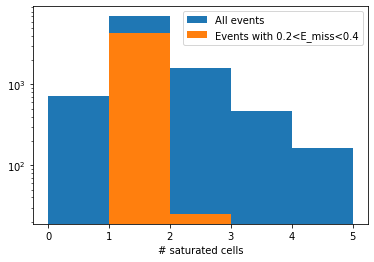

In [15]:
mp.hist(n_sat, 5, (0, 5), label='All events')
mp.hist(n_sat[mask], 5, (0, 5), label='Events with 0.2<E_miss<0.4')
mp.legend()
mp.xlabel('# saturated cells')
mp.yscale('log')
mp.show()

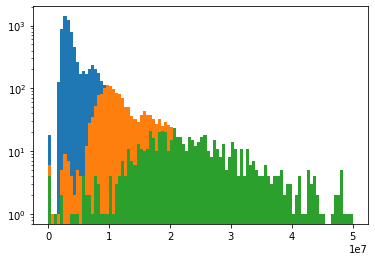

In [22]:
# mp.hist(e_miss, 100, (0, 5e7))
mp.hist(e_miss[n_sat == 1], 100, (0, 5e7))
mp.hist(e_miss[n_sat == 2], 100, (0, 5e7))
mp.hist(e_miss[n_sat >= 3], 100, (0, 5e7))
mp.yscale('log')
mp.show()

In [50]:
(n_sat == 1).sum()

6990

In [61]:
# ar = np.arange(6)
sat_layer_x = is_sat_x[n_sat == 1].sum(axis=2) == 1

In [69]:
sat_layer_x = sat_layer_x.argmax(axis=1)

(array([ 886.,   45.,  475.,  370.,   56.,   23., 5135.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Patch objects>)

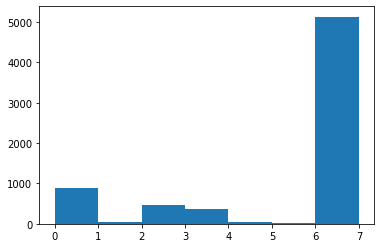

In [70]:
mp.hist(sat_layer_x, 7, (0., 7.))

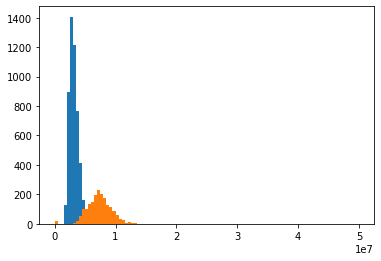

In [74]:
mp.hist(e_miss[n_sat == 1][sat_layer_x == 6], 100, (0, 5e7))
mp.hist(e_miss[n_sat == 1][sat_layer_x != 6], 100, (0, 5e7))
mp.show()

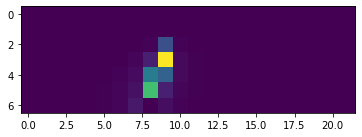

In [77]:
mp.imshow(bgo_x[n_sat == 1][sat_layer_x == 6][2])
mp.show()

Получить "изображение" одного события в BGO

    mp.imshow

Этот дата-сет был специально создан для исследования "перегрузки" каналов BGO. Видите белые "дырки" посередине ливня? Это и есть перегруженные каналы. Энергия, которая выделяется в ячейках BGO, записана в bgo_x_simu и bgo_y_simu

Получить изображение одного события из bgo_x,y_simu

Сделать гистограмму выделенной энергии

Получить разницу между зарегистрированной и симулированной энергией

Создать массив numpy типа bool, где для каждой ячейки будет указано, перегружена она или нет.

Посчитать количество перегруженных каналов на событие

Сколько событий из всех 10000 событий имеют один перегруженный канал?

Для событий с одним перегруженным каналом построить гистограмму номера слоя, в котором находится перегруженный канал.

Для нескольких событий, у которых theta около 0. построить энерговыделение в зависимости от номера слоя. 

Как зависит количество перегруженных каналов от энергии частицы?

Как зависит количество перегруженных каналов от наклона частицы?

Посторить гистограмму недостающей энергии для событий с одним перегруженным каналом

Сверху построить такую же гистограмму для двух перегруженных каналов

## Полезные полезности

Создание массивов:

    np.arange
    np.linspace
    np.logspace
    np.zeros
    np.ones
    np.empty
    np.eye # identity matrix
    np.full # full matrix
    dtype
    
Можно задавать размер массива, или его shape

Задача: создать массив, копию входного массива, в котором все нечетные числа заменены на -1

    arr = np.arange(10)
    out = np.where(arr % 2 == 1, -1, arr)
    arr
        #> [0 1 2 3 4 5 6 7 8 9]
    out
        #> [ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1]

Еще другие полезности:

    np.unique
    np.take
    np.max
    np.sort
    np.argmax
    

Случайные числа:

    np.random.seed
    np.random.randint
    np.random.normal
    np.random.shuffle

Задача: создать массив случайных чисел с каким-нибудь выдуманным распределением. Например, пусть функция плотности вероятности распределения описывается функцией

$$|\sin(x)|; x \in [0, \pi]$$

`*` -- это не матричное произведение, а просто произведение элементов. Если нужно матричное произведение, используем `np.dot`:

    x = np.array([[1,2],[3,4]])
    y = np.array([[5,6],[7,8]])

    v = np.array([9,10])
    w = np.array([11, 12])

    # Inner product of vectors; both produce 219
    print(v.dot(w))
    print(np.dot(v, w))

    # Matrix / vector product; both produce the rank 1 array [29 67]
    print(x.dot(v))
    print(np.dot(x, v))

    # Matrix / matrix product; both produce the rank 2 array
    # [[19 22]
    #  [43 50]]
    print(x.dot(y))
    print(np.dot(x, y))
    
Транспонирование векторов и матриц - `.T`

Задача: создать массивы x и y одинаковой длины. Случайно перемешать x и y одинаково (чтобы после перемешивания бывший элемент i в обоих элементах стоял на позиции j). То есть, например, имея в начале

    x = [1, 2, 3]
    y = [4, 5, 6]
    
получить в конце

    x = [2, 1, 3]
    y = [5, 4, 6]

# Broadcasting

    x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
    v = np.array([1, 0, 1])
    
Требуется прибавить вектор `v` к каждому ряду матрицы `x`

    x + v

Что происходит "за кулисами"?

    vv = np.tile(v, (4, 1))
    x + vv

Правила, позволяющие эффективно совмещать массивы разных размерностей называются broadcasting

Функции, поддерживающие broadcasting называются universal functions: http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

Еще пример с broadcasting:

    v = np.array([1,2,3])
    w = np.array([4,5])
    v.reshape(3, 1) * w

Задача: прибавить вектор к каждому столбцу матрицы

## Домашнее задание

Создать случайный массив numpy с целыми числами. Все нечетные (по значению) элементы массива заменить на -1

Создать два случайных массива, каждый второй элемент первого массива заменить соответствующим значением из второго.

Нормализовать массив, чтобы его значения оказались в интервале от 0 до 1.

Нормализовать массив, чтобы среднее оказалось на 0, а стандартное отклонение стало равно 1

Вставить значения np.nan в 20 случайных мест в массиве

(np.nan это специальное значение, Not-A-Number, которое ставится на место элементов массивов при выполнении недопустимых действий, таких как деление на 0)

Сосчитать количество элементов np.nan и np.inf в массиве

https://www.machinelearningplus.com/python/101-numpy-exercises-python/